**STATISTICAL LEARNING AND NEURAL NETWORKS, A.A. 2022/2023**

**COMPUTER LAB 2** - Model fitting and classification



**Exercise 1 – Model fitting for continuous distributions: Multivariate Gaussian**

In this exercise, you will employ a dataset based on the classic dataset *Iris Plants Database* https://archive.ics.uci.edu/ml/datasets/iris. You will be provided a subset of this dataset comprising only two classes (*Iris Setosa* and *Iris Versicolour*), and only two features per class (*petal length* in cm and *petal width* in cm). The objective is to the determine the kind of iris based on the content of the features.

**Task:** you have to fit class-conditional Gaussian multivariate distributions to the data, and visualize the probability density functions. In particular, you should perform the following:


*   Divide the dataset in two parts (*Iris Setosa* which corresponds to class zero and *Iris Versicolour* which correspond to class 1). Then work only on one class at a time.
*   Plot the data of each class (use the *plt.scatter( )* function)
*   Visualize the histogram of petal length and petal width (use e.g. the *plt.hist( )* function)
*   Calculate the maximum likelihood estimate of the mean and covariance matrix under a multivariate Gaussian model, independently for each class (these are the parameters of the class-conditional distributions). Note: is the Gaussian model good for these data?
*    Visualize the 2-D joint pdf of petal length and width for the two classes.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
%matplotlib inline
Dataset1 = h5py.File(r"C:\Users\Adalberto\Desktop\Msi\Magistrale\Secondo anno\Statistical learning\LAB 2\Lab2_Ex_1_Iris.hdf5")
Data = np.array(Dataset1.get('Dataset'))

In [4]:
#Separate the dataset in the two classes
Iris_S = Data[Data[:,2]==0,:]
Iris_V = Data[Data[:,2]==1,:]


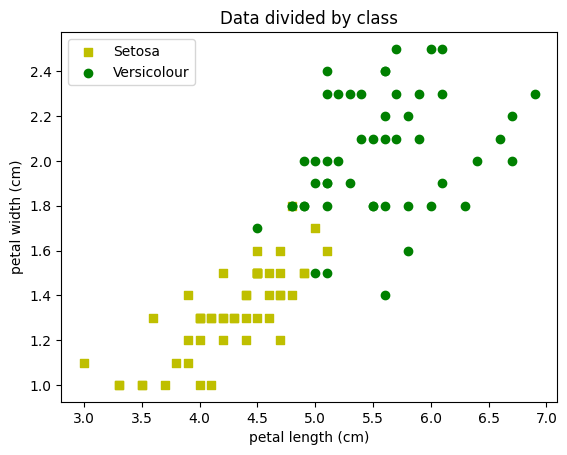

In [5]:
#Draw the scatter plot of the two classes on the same image
plt.scatter(Iris_S[:,0],Iris_S[:,1],label="Setosa",marker='s',c='y') 
plt.scatter(Iris_V[:,0],Iris_V[:,1],label="Versicolour",marker='o',c='g') 
plt.title('Data divided by class')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()


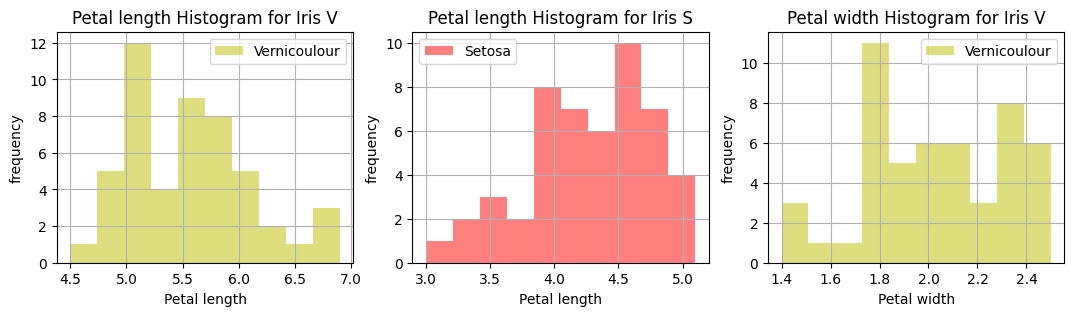

In [24]:
#Visualize the histogram of petal length and petal width 
fig, axes = plt.subplots(nrows=1, ncols=3,figsize = (13,3))
axes[0].set_title('Petal length Histogram for Iris V')
axes[0].hist(Iris_V[:,0],label='Vernicoulour',alpha=0.5,color='y')
axes[0].set_xlabel('Petal length')
axes[0].set_ylabel('frequency')
axes[0].grid(True)
axes[0].legend()
axes[1].hist(Iris_S[:,0],label='Setosa',alpha=0.5,color='r')
axes[1].set_title('Petal length Histogram for Iris S')
axes[1].set_xlabel('Petal length')
axes[1].set_ylabel('frequency')
axes[1].grid(True)
axes[1].legend()
axes[2].hist(Iris_V[:,1],label='Vernicoulour',alpha=0.5,color='y')
axes[2].set_title('Petal width Histogram for Iris V')
axes[2].set_xlabel('Petal width')
axes[2].set_ylabel('frequency')
axes[2].grid(True)
axes[2].legend();


###  Mean and covariance matrix under a multivariate Gaussian model

In [28]:
#Scalar products can be computed with the function np.matmul()
#The transpose can be obtained with the function np.transpose 
# We assume each training data to have p + 1 components (p features and 1 label)
# Data are not standardized
def matcov(data):
    n = len(data)
    p = len(data[0])
    # Consider only p features
    p -= 1
    μ = np.array([0.0 for _ in range(p)])
    Σ = [[  0.0 for _ in range(p)] for _ in range(p)]
    # Compute mean by components
    for datapt in data[:,range(p)]:
        for j in range(p):
            μ[j] += (1/n)*(datapt[j]) 
    # Compute sample covariance matrix
    for datapt in data[:,range(p)]:
        Σ += (1/n)*np.matmul(datapt[:,np.newaxis],datapt[np.newaxis,:])
    # Remove mean
    Σ -= np.matmul(μ[:,np.newaxis],μ[np.newaxis,:])
    return μ,Σ

In [29]:
GV=matcov(Iris_V)

In [30]:
GS=matcov(Iris_S)

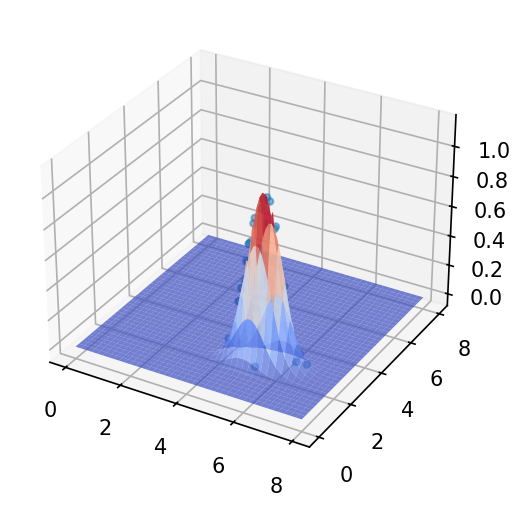

In [31]:
#Visualize the 2-D joint pdf of petal length and width, a pdf function can be initialized by providing mean and covariance matrix
from scipy.stats import multivariate_normal
from matplotlib import cm
from matplotlib.ticker import LinearLocator

pdf_class0 = multivariate_normal(mean=GV[0], cov=GV[1])
pdf_class1 = multivariate_normal(mean=GS[0], cov=GS[1])

#Create a grid of x and y values on which to sample the pdf, this is done by providing a list of x-y of coordinates to the function pdf_class0.pdf(...)
#A 3D view of the pdf can be obtained using the function ax.plot_surface

X = np.arange(0.0,8.1,0.1)
Y = np.arange(0.0,8.1,0.1)

X, Y = np.meshgrid(X, Y)
X_flat = X.flatten()
Y_flat = Y.flatten()
XY_list = np.concatenate((X_flat[:,np.newaxis],Y_flat[:,np.newaxis]),axis=1)
PDF_values = np.reshape(pdf_class0.pdf(XY_list), np.shape(X))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(4, 4), dpi=150)
ax.plot_surface(X, Y, PDF_values,cmap=cm.coolwarm, alpha=0.7, linewidth=0)
#ax.view_init( 0, 270)
#To change the orientation of the 3D plot the function ax.view_init(), for a view from above select ax.view_init( 90, 0)

#After visualizing the pdf you can plot the points of the dataset on the estimated pdf using ax.scatter3D()
#For a better visualization of the points we suggest to make the pdf plot semi-transparent using the alpha parameter

X1, Y1 = Iris_V[:,0], Iris_V[:,1]
XY_V_list = np.concatenate((X1[:,np.newaxis],Y1[:,np.newaxis]),axis=1)
XY_V = np.concatenate((Iris_V[:,0][:,np.newaxis],Iris_V[:,1][:,np.newaxis]),axis=1)
PDF_points_class0 = np.reshape(pdf_class0.pdf(XY_V_list), np.shape(X1))
ax.scatter3D(X1,Y1, PDF_points_class0,alpha = 0.5, s=10);


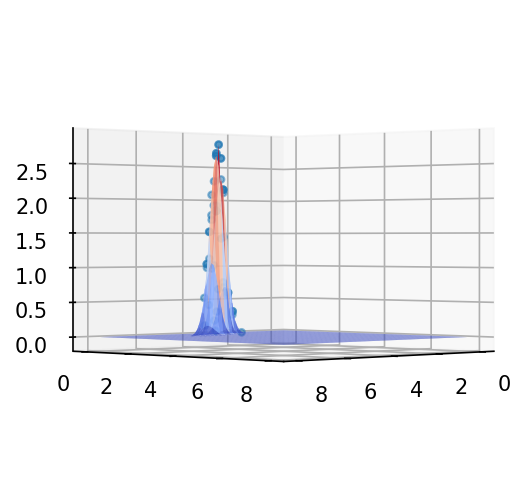

In [32]:
X = np.arange(0.0,8.1,0.1)
Y = np.arange(0.0,8.1,0.1)
X, Y = np.meshgrid(X, Y)
X_flat = X.flatten()
Y_flat = Y.flatten()

XY_list = np.concatenate((X_flat[:,np.newaxis],Y_flat[:,np.newaxis]),axis=1)
PDF_values = np.reshape(pdf_class1.pdf(XY_list), np.shape(X))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(4, 4), dpi=150)
ax.plot_surface(X, Y, PDF_values,cmap=cm.coolwarm, alpha=0.7, linewidth=0)
ax.view_init( 0,45)
X1, Y1 = Iris_S[:,0], Iris_S[:,1]

XY_V_list = np.concatenate((X1[:,np.newaxis],Y1[:,np.newaxis]),axis=1)
XY_V = np.concatenate((Iris_S[:,0][:,np.newaxis],Iris_S[:,1][:,np.newaxis]),axis=1)
PDF_points_class1 = np.reshape(pdf_class1.pdf(XY_V_list), np.shape(X1))
ax.scatter3D(X1,Y1, PDF_points_class1,alpha = 0.5, s=10);

**Comments to Exercise 1**


We can clearly visualize by the plotting of width and length of each of the classes (Iris V and Iris S) that the features are correlated (es thin and short petals are typical of Iris Setosa). The Joint-probability plot of each class shows that most of the data was represented in the pdf which suggests that this is a good model for the current dataset classes.

**Exercise 2 - Model fitting for discrete distributions: Bag of Words**


In this exercise, you will employ a real dataset (file *SMSSpamCollection*). The SMS Spam Collection v.1 (https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset) is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.
Task: you have to fit the parameters employed by a Naïve Bayes Classifier, using a Bernoulli model. Under this model, the parameters are:

*   $\pi_{c}$, the prior probabilities of each class.
*   $\theta_{jc}$, the probability that feature j is equal to 1 in class c.

Model fitting can be done using the pseudocode at the end of the Lecture 3 slides.

Display the class-conditional densities $\theta_{jc1}$ and $\theta_{jc2}$. Try to identify “uninformative” features (i.e., features j such that $\theta_{jc1}$ ≃ $\theta_{jc2}$).

In [33]:
import numpy as np
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
import matplotlib.pyplot as plt

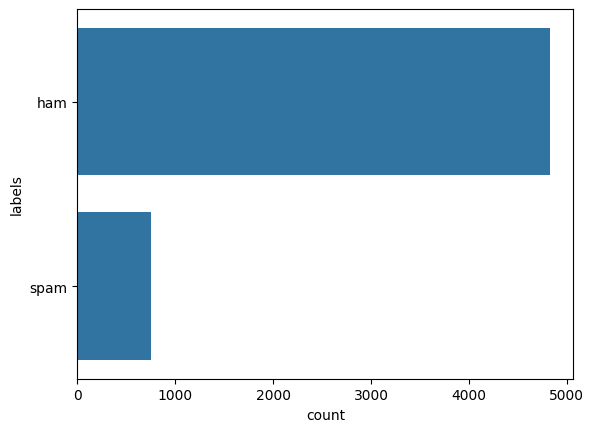

In [34]:
data=pd.read_csv(r"C:\Users\Adalberto\Desktop\Msi\Magistrale\Secondo anno\Statistical learning\LAB 2\SMSSpamCollection", encoding = "ISO-8859-1",sep='\t',header=None)
data.rename(columns = {0:'labels', 1:'text'}, inplace=True)
sns.countplot(data['labels']);

In [35]:
#Dataset Preprocessing: conversion from a collection of sentences into a Bag_of_words representation
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk

ps = PorterStemmer()
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

corpus = []
for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['text'][i]) #remove all characters which are not letters 
    review = review.lower() #set everything to lower case
    review = review.split() #split into words
    #remove stopwords (articles and other uniformative words), replace words with their "stem" (basic form without conjugations and pluralizations )
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')] 
    review = ' '.join(review)
    corpus.append(review)

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)



X = cv.fit_transform(corpus).toarray() #Convert dataset into Bag of words using the most informative 2500 words 
feature_names = cv.get_feature_names_out()
print( f"Some examples of words which are used as features: {feature_names}") #This vector of strings contain the kind of words that are used as features. They obtained words can be truncated since they are in the "stem" form 

y = pd.get_dummies(data['labels'])
y = y.iloc[:,1].values #convert the name of the two classes ("ham" and "spam") into numeric values "0" and "1"

#Partition Training and Testing set
#The training set is composed of 2000 SMS with 2500 features each, which identify wether a word from dictionary is present or not following the BoW representation
X_train = X[:2000,:] 
#y_train is composed of the 2000 labels for the training examples, indicating wether a message is real (class 0) or spam (class 1)
y_train = y[:2000]   #

X_test = X[2000:3000,:] #1000 SMS are used in the testing set
y_test =y[2000:3000]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Adalberto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Some examples of words which are used as features: ['aah' 'aathi' 'abi' ... 'zed' 'zindgi' 'zoe']


Prior probabilities $\pi_{c}$ of each class.

In [37]:
(_,total_features) = X_train.shape
total_data=len(y_train)
ham_total = (y_train==0).sum() # ham
spam_total = (y_train==1).sum() # spam
priors = [ ham_total/total_data , spam_total/total_data] 
priors

[0.86, 0.14]

Class-conditional densities $\theta_{jc1}$ and $\theta_{jc2}$

In [38]:
Njc = np.ones([2,total_features]) #We add ones to the frequencies in order to avoid overflow
for i in range(0,total_data):
    c = y_train[i]
    for j in range(0,total_features):
        if X_train[i,j]==1:
            Njc[int(c),j] += 1
Ojc = np.zeros([2,total_features])
Ojc[0] = Njc[0] / ham_total 
Ojc[1] = Njc[1] / spam_total 


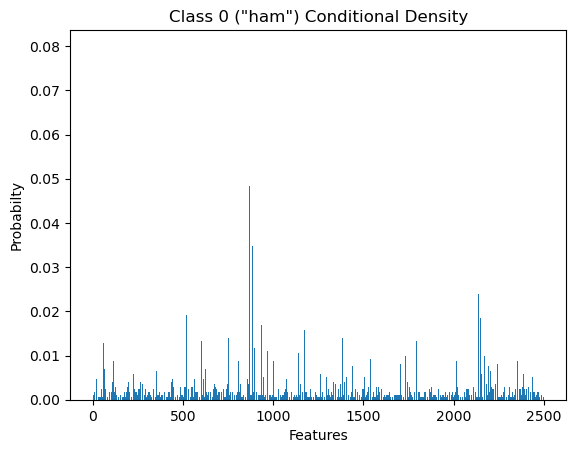

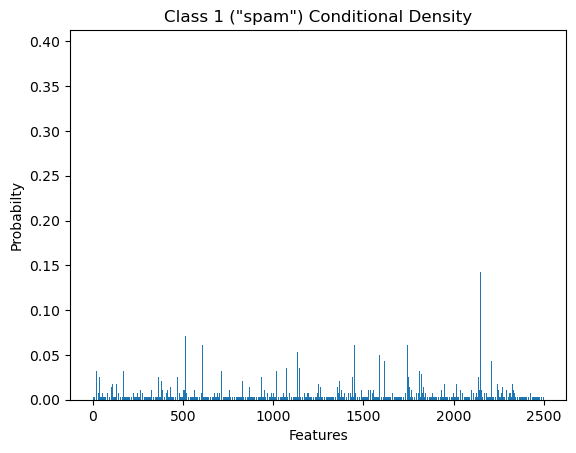

In [10]:
#Display the class-conditional densities θjc1 and θjc2.
#plt.figure(2,figsize=(15,11))
plt.figure()
plt.bar(range(0,total_features),Ojc[0])
plt.xlabel('Features')
plt.ylabel('Probabilty')
plt.title('Class 0 ("ham") Conditional Density')
plt.show()

plt.figure()
plt.bar(range(0,total_features),Ojc[1])
plt.xlabel('Features')
plt.ylabel('Probabilty')
plt.title('Class 1 ("spam") Conditional Density')
plt.show()

**Exercise 3 - Classification – discrete data**

In this exercise, you will design a Naïve Bayes Classifier (NBC) for the Bag of Words (BoW) features for document classification that have been prepared in *Exercise 2*. In particular, in *exercise 2*, you have already estimated the following parameters:


*   The prior probabilities of each class, $\pi_{c} = p(y=c)$.
*   The class-conditional probabilities of each feature, $\theta_{jc} = p(x_{j}=1 | y=c)$.

These parameters have been estimated from the training data. In this exercise, you will use the test data, and classify each test vector using an NBC whose model has been fitted in *Exercise 2*. In particular, you will do the following:



*   For each test vector, calculate the MAP estimate of the class the test vector belongs to. Remember: the MAP classifier chooses the class that maximizes $\mathop{\max\limits_c{\log p(y=c|x)} \propto \log p(x|y=c)} + \log p(c)$. In the NBC, the features (i.e. each entry of $x$) are assumed to be statistically independent, so $p(x|y=c) = \prod_{j=1}^{D}p(x_{j}|y=c)$. This formula allows you to calculate $p(x|y=c)$ for a given test vector $x$ using the parameters $\theta_{jc}$ already calculated in *Exercise 2*. Note that, after the logarithm, the product 
becomes a summation. It is much better to use the logarithm in order to avoid underflow.
*   See how the accuracy changes when the prior is not taken into account (e.g. by comparing the MLE and MAP estimate).
*   After classifying a test vector using the NBC, the obtained class can be compared with the truth (vector *ytest*).
*   The accuracy of the classifier can be computed as the percentage of times that the NBC provides the correct class for a test vector.
*   Repeat the same operations using the training data as test data, and compare the accuracy of the classifier on the training and test data.
*   Note: It is expected that students implement the Naive Bayes classifier from scratch without using pre-made functions such as sklearn.naive_bayes



**Accuracy with MAP estimate**

In [11]:
#posterior[data point x ,class]

In [39]:
y_pred = []
posterior= np.zeros([len(y_test),2])
for i in range(0,len(y_test)):
    # MAP ESTIMATE OF EACH TEST EXAMPLE
    map_est = np.zeros([2,1])
    for j in range(0,total_features):
        for c in range(0,2):
            map_est[c] += X_test[i,j]*np.log(Ojc[c][j]) + (1 - X_test[i,j])*np.log(1 - Ojc[c][j])
    for c in range(0,2):
        map_est[c] += np.log(priors[c])
    for c in range(0,2):
        posterior[i,c] = map_est[c].copy() 
    predicted_label = np.argmax(map_est)
    y_pred.append(predicted_label)
accuracy_test = (np.sum(y_test.T==y_pred)/len(y_test))*100

In [40]:
#Accuracy on test set
accuracy_test

97.5

In [14]:
posterior

array([[-23.54994794, -38.91633804],
       [-41.32425932, -56.71400288],
       [-26.2344606 , -38.62841545],
       ...,
       [-68.56942787, -74.74692136],
       [-27.75459905, -43.02159972],
       [-14.18539459, -29.05101976]])

**Accuracy with MLE estimate**

In [15]:
#Evaluate the MLE on the test set
#Let us assume that the prior p(ℎ) is uniformly  distributed over all classes,
# if so, it doesn't enter in the maximization
y_pred1 = []
priors = [1/2, 1/2]
for i in range(0,len(y_test)):
    # MLE ESTIMATE OF EACH TEST EXAMPLE
    mle_est = np.zeros([2,1])
    for j in range(0,total_features):
        for c in range(0,2):
            mle_est[c] += X_test[i,j]*np.log(Ojc[c][j]) + (1 - X_test[i,j])*np.log(1 - Ojc[c][j])
    for c in range(0,2):
        mle_est[c] += np.log(priors[c])
    predicted_label = np.argmax(mle_est)
    y_pred1.append(predicted_label)
accuracy_test1 = (np.sum(y_test.T==y_pred1)/len(y_test))*100

In [16]:
#Accuracy on test set
accuracy_test1

97.1

**Compare the accuracy of the classifier on the training and test data** \
\
\
Accuracy on training data

In [18]:
#using MLE estimate
y_pred2 = []
priors = [1/2, 1/2]
for i in range(0,len(y_train)):
    # MLE ESTIMATE OF EACH TEST EXAMPLE
    mle_est = np.zeros([2,1])
    for j in range(0,total_features):
        for c in range(0,2):
            mle_est[c] += X_train[i,j]*np.log(Ojc[c][j]) + (1 - X_train[i,j])*np.log(1 - Ojc[c][j])
    for c in range(0,2):
        mle_est[c] += np.log(priors[c])
    predicted_label = np.argmax(mle_est)
    y_pred2.append(predicted_label)
accuracy_train = (np.sum(y_train.T==y_pred2)/len(y_train))*100

In [19]:
accuracy_train
# the result is slightly better on training data 

98.45

**Optional: Features selection**

If you plot the class-conditional densities as done at the end of Exercise 2, you will see that many features are uninformative; e.g., words that appear very often (or very rarely) in documents belonging to either class are not very helpful to classify a document. The NBC can perform a lot better if these uninformative features are disregarded during the classification, i.e. only a subset of the features, chosen among the most informative ones, are retained. To rank the features by “significance”, one can employ the mutual information between feature $x_{j}$ and class $y$ (see Sec. 3.5.4 of the textbook):

\begin{align*}
I(X,Y) = \sum_{xj} \sum_{y}p(x_{j},y) \log \frac{p(x_{j},y)}{p(x_{j})p(y)}
\end{align*}

For binary features, the mutual information of feature j can be written as:

\begin{align*}
I_{j} = \sum_{c} \left[\theta_{jc}\pi_{c}\log \frac{\theta_{jc}}{\theta_{j}}+ (1 - \theta_{jc})\pi_{c} \log \frac{1 - \theta_{jc}}{1 - \theta_{j}}\right]
\end{align*}

with $\theta_{j}=p(x_{j}=1)=\sum_{c}\pi_{c}\theta_{jc}$. y
For this part, you should:

 Note: try to avoid divisions by zero adding the machine precision constant *eps* to the denominators.
*   Rank the features by decreasing values of $I_{j}$, and keep only the $K$ most important ones.

*    Run the classifier employing only the $K$ most important features, and calculate the accuracy.

*    Plot the accuracy as a function of $K$.

In [41]:
#Optional section
# compute θ_{j}
θj = np.zeros([1,total_features])
for j in range(0,total_features):
    for c in range(0,2):
        θj[:,j] += priors[c]*Ojc[c][j]
# equivalently with comprehensions
# θj = [sum(priors[index]*Ojc[index,index2] for index in range(0,2)) for index2 in range(0,total_features)]
# compute the mutual information of feature j
Itest = np.zeros([1,total_features])
for j in range(0,total_features):
    for c in range(0,2):
        Itest[0,j] +=priors[c].copy()*Ojc[c][j]*np.log(Ojc[c][j]/θj[:,j]) + (1 - Ojc[c][j])*priors[c].copy()*np.log((1 - Ojc[c][j])/(1 - θj[:,j]))        

In [42]:
θj

array([[0.0015, 0.002 , 0.001 , ..., 0.0015, 0.001 , 0.002 ]])

In [43]:
# K most important features
K=10
K_set =Itest[0,:].argsort()[::-1][:K]

In [44]:
K_range = [0,50,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1800,1900,2000,2000,2100,2200,2300,2500]

In [45]:
accurK = []
for K in K_range:
    K_set =Itest[0,:].argsort()[::-1][:K]
    new_X_train = X_train[:,K_set]
    new_X_test = X_test[:,K_set]
    Ojc_acc = np.zeros([2,len(K_set)])
    Ojc_acc[0] = Ojc[0,K_set]
    Ojc_acc[1] = Ojc[1,K_set]
    y_pred = []
    for i in range(0,len(y_test)):
    # MAP estimate of each test sample 
        map_est = np.zeros([2,1])
        for j in range(0,len(K_set)):
            for c in range(0,2):
                    map_est[c] += new_X_test[i,j]*np.log(Ojc_acc[c][j]) + (1 - new_X_test[i,j])*np.log(1 - Ojc_acc[c][j])
        for c in range(0,2):
            map_est[c] += np.log(priors[c])
        predicted_label = np.argmax(map_est)
        y_pred.append(predicted_label)
    accurK.append((np.sum(y_test.T==y_pred)/len(y_test))*100)

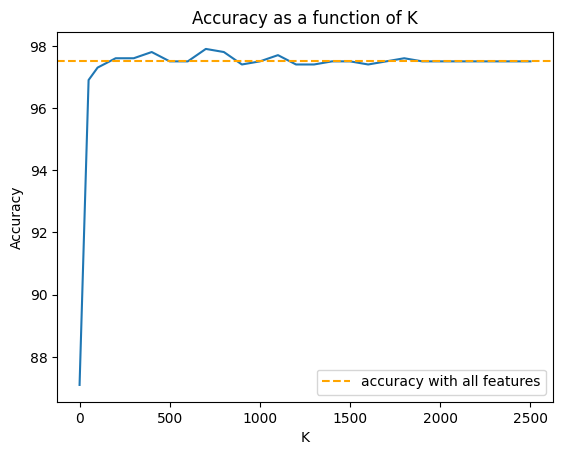

In [46]:
plt.figure()
plt.plot(K_range,accurK)
plt.axhline(y=97.5,label = 'accuracy with all features',color = "orange",linestyle ="--")
plt.title('Accuracy as a function of K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Exercise 4 – Plotting the ROC curve**

For the discrete data classification problem of Exercise 3, analyse the performance of the classifier plotting the complete ROC curve, instead of simply measuring the accuracy. This requires to do the following.

*   Instead of classifying the documents choosing class 1 if $p(y=1|x)>p(y=2|x)$, now you can generalize this to choosing class 1 if $\frac{p(y=1|x)}{p(y=2|x)}>\tau \in [0, \infty)$ for some threshold $\tau$ that determines the compromise between true positive rate (TPR) and false positive rate (FPR). 
*   Choose a **reasonable** range of values for $\tau$. For each value of $\tau$, compute the TPR and FPR on the dataset (Hint: determine suitable minimum and maximum values for $\tau$, and sample densely enough in that range). 
* Plot a curve of TPR as a function of FPR – this is the ROC curve for this classifier.

*   Determine an estimate of the Equal Error Rate (EER), i.e. the point of the ROC curve such that TPR+FPR=1.

In [30]:
def ROCpoint(ytrue,ypred):
    ones= np.sum(ytrue==1)
    zeros= np.sum(ytrue==0)
    Tpr = 0.0
    Fpr = 0.0
    for i in range(0,len(ytrue)):
        if ypred[i] == ytrue[i] and ytrue[i] == 1:
            Tpr +=(1/ones)
        elif ypred[i] == 1 and ytrue[i] == 0:
            Fpr +=(1/zeros)
    return Tpr,Fpr

In [31]:
#Use the posterior probabilities computed previously and classify using the formula above to estimate tau.
def ROCclassifier(posteriors,data,τ):
    y_predτ = []
    for i in range(0,len(data)):
        if posteriors[i,0]/posteriors[i,1] < τ :
            y_predτ.append(0)
        else:
            y_predτ.append(1)
    accurτ = (np.sum(data.T==y_predτ)/len(data))*100
    return y_predτ,accurτ
        

#Note: To estimate the TPR you need to compute the number of cases where class 1 is correctly predicted, 
#this value then has to be divided by the number of elements in the test set which belong to class 1 

#The FPR is computed by selecting the number of cases where class 1 is predicted incorrectly, 
#this value then has to be divided by the number of elements in the test set which do not belong to class 1  

#The point corresponding to the EER can be found by plotting on the ROC curve the function y = 1 - x

**Check for τ = 1**

In [32]:
ypred = ROCclassifier(posterior,y_test,0.0)
ROCpoint(y_test,ypred[0])

(1.0000000000000016, 0.9999999999999862)

**Check for τ  sufficiently large**

In [43]:
ypred = ROCclassifier(posterior,y_test,2)
ROCpoint(y_test,ypred[0])

(0.0, 0.0)

**ROC plot**

In [32]:
τrange = np.arange(0.0,2,0.02)
Tpr=[]
Fpr=[]
for τ in τrange:
    ypred= []
    ypred = ROCclassifier(posterior,y_test,τ)[0]
    Tpr.append(ROCpoint(y_test,ypred)[0])
    Fpr.append(ROCpoint(y_test,ypred)[1])   


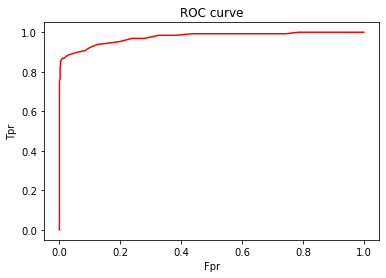

In [33]:
plt.figure()
plt.plot(Fpr, Tpr,color = 'r')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title('ROC curve')
plt.show()

**Exercise 5 – Classification – continuous data**

This exercise employs the Iris dataset already employed in Exercise 1, and performs model fitting and classification using several versions of **Gaussian discriminative analysis**. However, for this exercise the available data have to be divided into two sets, namely *training* and *test* data. 

You will have to 1) re-fit the training data to the specific model (see below), 2) classify each of the test samples, and 3) calculate the accuracy of each classifier.

Classifiers to be employed:
*   Two-class quadratic discriminant analysis (fitting: both mean values and covariance matrices are class-specific – same as in exercise 1).
*   Two-class linear discriminant analysis (fitting: class-specific mean values as in the previous case. Shared covariance matrix is calculated putting together the elements of both classes; the mean values should also be recalculated accordingly).

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

Dataset1 = h5py.File(r"C:\Users\Adalberto\Desktop\Msi\Magistrale\Secondo anno\Statistical learning\LAB 2\Lab2_Ex_1_Iris.hdf5")
Data = np.array(Dataset1.get('Dataset')) 

Train = Data[:50,:]
Test = Data[50:,:]

In [45]:
# Two-class quadratic discriminant analysis (fitting: both mean values and covariance matrices are class-specific – same as in exercise 1).
Iris_S_train = Train[Train[:,2]==0,:]
Iris_V_train = Train[Train[:,2]==1,:]

In [48]:
#Priors for the Iris set
priors = [0.0,0.0]
n=len(Train[:,])
for i in Train[:,2]:
    if i==0.0:
        priors[0]+=(1/n)
    else:
        priors[1]+=(1/n)
priors

[0.5200000000000001, 0.48000000000000015]

In [50]:
μs,Σs = matcov(Iris_S_train[:,range(0,2)])
μv,Σv = matcov(Iris_V_train[:,range(0,2)])

In [35]:
def QD_classifier(x,μ0,Σ0,μ1,Σ1,prior):
    c0 = priors[0]*(np.linalg.det(2*np.pi*Σ0))**-0.5 * np.exp(-0.5 *(np.matmul(x[np.newaxis,:]-μ0[np.newaxis,:],np.matmul(np.linalg.inv(Σ0),x[:,np.newaxis]-μ0[:,np.newaxis])))) 
    c1 = priors[1]*(np.linalg.det(2*np.pi*Σ1))**-0.5 * np.exp(-0.5 *(np.matmul(x[np.newaxis,:]-μ1[np.newaxis,:],np.matmul(np.linalg.inv(Σ1),x[:,np.newaxis]-μ1[:,np.newaxis]))))
    return np.argmax([c0/(c0+c1),c1/(c0+c1)])

**Accuracy on test set for the QDA**

In [135]:
acc=0.0
for i in range(0,len(Test)):
    n = len(Test)
    if QD_classifier(Test[i,range(0,2)],μs,Σs,μv,Σv,priors) == Test[i,2]:
        acc +=1/n
acc

0.9800000000000005

In [51]:
#Two-class linear discriminant analysis (fitting: class-specific mean values as in the previous case. Shared covariance matrix is calculated putting together the elements of both classes; the mean values should also be recalculated accordingly).
d,Σ = matcov(Train[:,range(0,2)])
βs=np.matmul(np.linalg.inv(Σ),μs[:,np.newaxis])
βv=np.matmul(np.linalg.inv(Σ),μv[:,np.newaxis])
γs = - 0.5*np.matmul(μs[np.newaxis,:],βs) + np.log(priors[0])
γv = - 0.5*np.matmul(μv[np.newaxis,:],βv) + np.log(priors[1])

In [220]:
def LD_classifier(x,μ0,μ1,Σ,prior):
    β0=np.matmul(np.linalg.inv(Σ),μ0[:,np.newaxis])
    β1=np.matmul(np.linalg.inv(Σ),μ1[:,np.newaxis])
    γ0 = - 0.5*np.matmul(μ0[np.newaxis,:],β0) + np.log(prior[0])
    γ1 = - 0.5*np.matmul(μ1[np.newaxis,:],β1) + np.log(prior[1])
    c0=np.exp(np.matmul(np.transpose(β0),x[:,np.newaxis]) + γ0)
    c1=np.exp(np.matmul(np.transpose(β1),x[:,np.newaxis]) + γ1)
    return np.argmax([c0/(c0+c1),c1/(c0+c1)])
    

**Accuracy on test set for the LDA**

In [233]:
accurac=0.0
for i in range(0,len(Test)):
    n = len(Test)
    if LD_classifier(Test[i,range(0,2)],μs,μv,Σ,priors) == Test[i,2]:
        accurac +=1/n
accurac

0.9600000000000005

**Exercise 6 – Classification – continuous data**

Classify the data in the phoneme dataset from Lab. 1 using quadratic discriminant analysis, linear discriminat analysis and a Naive Bayes classifier. 

Compute the accuracy of each classifier and compare its performance with that of the k-nn classifier developed in Lab. 1.

Note: in Lab1 we had to employ a subset of the oiginal dataset due to the fact that k-nn has a quadratic complexity making it unfit for use on large datasets. The algorithms illustrated in this Lab have smaller complexity and thus it is possible to train on more data.

For this exercise you can use the sklearn library.

In [53]:
import numpy as np
import h5py
from scipy.stats import multivariate_normal

Dataset2 = h5py.File(r"C:\Users\Adalberto\Desktop\Msi\Magistrale\Secondo anno\Statistical learning\LAB 2\Lab2_Ex_6_phoneme.hdf5")
Data = np.array(Dataset2.get('Dataset'))

Train = Data[:4000,:]
Test = Data[4000:,:]
len_dat = np.shape(Test)[0]
# len_data is the number of test samples

from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB


data_train_points=Train[:,range(0,len(Train[0,:])-1)]
train_classes=Train[:,len(Train[0,:])-1]
data_test_points=Test[:,range(0,len(Test[0,:])-1)]
test_classes=Test[:,len(Test[0,:])-1]



#Part 1
clf = LinearDiscriminantAnalysis()
clf.fit(data_train_points,train_classes)



#Part 2
clf2 = QuadraticDiscriminantAnalysis()
clf2.fit(data_train_points,train_classes)
#Complete here

#Part 3
clf3 = GaussianNB()
clf3.fit(data_train_points,train_classes)
#Complete here

GaussianNB()

**Accuracy for LD analysis**

In [55]:
LD_ac=0.0
for i in range(0,len_dat):
    if clf.predict([data_test_points[i]]) == test_classes[i]:
        LD_ac +=1/(len_dat)
LD_ac

0.9410609037328014

**Accuracy for QD analysis**

In [56]:
QD_ac=0.0
for i in range(0,len_dat):
    if clf2.predict([data_test_points[i]]) == test_classes[i]:
        QD_ac +=1/(len_dat)
QD_ac

0.8880157170923305

**Accuracy for Gaussian NB**

In [57]:
NB_ac=0.0
for i in range(0,len_dat):
    if clf3.predict([data_test_points[i]]) == test_classes[i]:
        NB_ac +=1/(len_dat)
NB_ac

0.9017681728880081

**Comparison with the *k-nn* classifier**

In [58]:
def euclidian_distance(pt1,pt2):
    distance = np.sqrt(np.sum((pt1-pt2)**2))
    return distance

def accuracy(y,y_guessed):
    N=len(y)
    err=0
    for i in range(0,N-1):
        if y[i] != y_guessed[i]:
            err += 1/N        
    return 1 - err

def k_nn(X_train, X_sample, k_val):
    y_hat = []
    for test_pt in X_sample[:,range(0,len(X_sample[0,:])-1)]:
        distances = []
        for train_pt in X_train[:,range(0,len(X_train[0,:])-1)]:
            distances.append(euclidian_distance(train_pt, test_pt))               
        k_nn = np.argsort(distances)[0:k_val]
        labels =X_train[k_nn,len(X_train[0,:])-1]
        classes, counts = np.unique(labels, return_counts=True)
        index = np.argmax(counts)
        y_hat.append(classes[index])
        
    return y_hat

**For the subset data sample of lab 1, the optimal $k$ was around the value $15$**

In [59]:
y_pred=k_nn(Train,Test, 15)

In [60]:
accuracy(y_pred,test_classes)

0.9312377210216111